In [7]:
import numpy as np 
import pandas as pd
from keras.preprocessing.sequence import pad_sequences
import tensorflow as tf

ImportError: Keras requires TensorFlow 2.2 or higher. Install TensorFlow via `pip install tensorflow`

In [8]:
tf.__version__

NameError: name 'tf' is not defined

In [ ]:
# Load the TensorBoard notebook extension
%reload_ext tensorboard

In [ ]:
import tensorflow as tf
import datetime, os

In [ ]:
df = pd.read_csv(r"C:\Users\Pranav\Documents\Python Scripts\IMDB Dataset.csv")


In [ ]:
df.head()

In [ ]:
df.shape


In [ ]:
from nltk.corpus import stopwords
stop_words =stopwords.words('english')
def remove_stopwords(text):#remove_stopwords function gives stopwordfree sentences
    words=[word for word in text.split() if word not in stop_words]
    return words
df["review_new"]=df['review'].apply(lambda x: ' '.join(remove_stopwords(x)))    
df.head()   

In [3]:
lables = []
for i in df['sentiment']:
    if i == "positive":
        lables.append(1)
    else:
        lables.append(0)
Y = lables 

NameError: name 'df' is not defined

In [174]:
from keras.preprocessing.text import Tokenizer


In [175]:
max_words = 10000 # We will only consider the 10K most used words in this dataset
tokenizer = Tokenizer(num_words=max_words)     
tokenizer.fit_on_texts(df['review_new']) 
sequences = tokenizer.texts_to_sequences(df['review_new']) 

In [176]:
word_index = tokenizer.word_index

In [177]:
from keras.preprocessing.sequence import pad_sequences
maxlen = 100
pad = pad_sequences(sequences, maxlen=100)
pad.shape

(50000, 100)

In [178]:
X = pad  #independent variable X


In [179]:
from  keras.layers import Embedding ,Flatten, Dense
from keras.models import Sequential

In [180]:
f =open(r'C:\Users\Pranav\Documents\Python Scripts\glove.6B.100d.txt', encoding="utf8")


In [181]:
# then after we need a mean and standard deviation of values
embeddings_index = {}
for line in f:                             
    values = line.split()
    word = values[0]
    embedding = np.asarray(values[1:], dtype='float32') # Load embedding
    embeddings_index[word] = embedding 


In [182]:
f.close()


In [183]:

all_emb=np.stack(embeddings_index.values())
emb_mean = all_emb.mean()
emb_std = all_emb.std()
print(emb_mean)
print(emb_std)

C:\Users\Pranav\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  """Entry point for launching an IPython kernel.


0.004451992
0.4081574


In [184]:

embedding_dim = 100
nb_words = min(max_words, len(word_index))
print(nb_words)
emb_matrix = np.random.normal(emb_mean,emb_std,(nb_words,embedding_dim))


10000


In [185]:
emb_matrix.mean(),emb_matrix.std()


(0.004832453938120693, 0.40761232719057705)

In [186]:
for word,i in word_index.items():
    if i >= max_words:
        continue
    embedding_vector = embeddings_index.get(word)
    # If there is an embedding vector, put it in the embedding matrix
    if embedding_vector is not None: 
        emb_matrix[i] = embedding_vector

In [187]:
print(emb_matrix.shape)


(10000, 100)


In [188]:
model =Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen, weights = [emb_matrix], trainable = False))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_7 (Embedding)      (None, 100, 100)          1000000   
_________________________________________________________________
flatten_7 (Flatten)          (None, 10000)             0         
_________________________________________________________________
dense_11 (Dense)             (None, 32)                320032    
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 33        
Total params: 1,320,065
Trainable params: 320,065
Non-trainable params: 1,000,000
_________________________________________________________________


In [189]:



model.compile(optimizer='adam',
              loss='binary_crossentropy',metrics=['acc'])
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.25)
print(x_test.shape)
# logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
# tensorboard_callback= tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)


# print(y_test[0])
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=64,
                    validation_data=(x_test, y_test) )


(12500, 100)
Train on 37500 samples, validate on 12500 samples
Epoch 1/10
37500/37500 [==============================] - 6s 168us/step - loss: 0.5586 - acc: 0.7107 - val_loss: 0.4938 - val_acc: 0.7604
Epoch 2/10
37500/37500 [==============================] - 5s 142us/step - loss: 0.4527 - acc: 0.7864 - val_loss: 0.6144 - val_acc: 0.7027
Epoch 3/10
37500/37500 [==============================] - 5s 138us/step - loss: 0.4099 - acc: 0.8107 - val_loss: 0.4832 - val_acc: 0.7685
Epoch 4/10
37500/37500 [==============================] - 6s 154us/step - loss: 0.3777 - acc: 0.8281 - val_loss: 0.5058 - val_acc: 0.7654
Epoch 5/10
37500/37500 [==============================] - 5s 130us/step - loss: 0.3462 - acc: 0.8429 - val_loss: 0.5275 - val_acc: 0.7598
Epoch 6/10
37500/37500 [==============================] - 5s 121us/step - loss: 0.3131 - acc: 0.8628 - val_loss: 0.5474 - val_acc: 0.7521
Epoch 7/10
37500/37500 [==============================] - 4s 117us/step - loss: 0.2799 - acc: 0.8787 - val_lo

In [213]:
my_text = 'I love dogs. Dogs are the best. They are lovely, cuddly animals that only want the best for humans.'

seq = tokenizer.texts_to_sequences([my_text])
print('raw seq:',seq)
seq = pad_sequences(seq, maxlen=maxlen)
print('padded seq:',seq)
prediction = model.predict(seq)
print('positivity:',prediction)

raw seq: [[2, 45, 2247, 2247, 612, 3, 48, 118, 612, 1275, 1557, 64, 732, 99, 3, 48, 123, 1821]]
padded seq: [[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    2   45
  2247 2247  612    3   48  118  612 1275 1557   64  732   99    3   48
   123 1821]]
positivity: [[0.9585109]]


In [214]:
my_text = 'The action-drama comes out as a horrible made video game. '

seq = tokenizer.texts_to_sequences([my_text])
print('raw seq:',seq)
seq = pad_sequences(seq, maxlen=maxlen)
print('padded seq:',seq)
prediction = model.predict(seq)
print('positivity:',prediction)

raw seq: [[3, 127, 391, 200, 167, 77, 30, 431, 28, 307, 405]]
padded seq: [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   3
  127 391 200 167  77  30 431  28 307 405]]
positivity: [[0.13380654]]


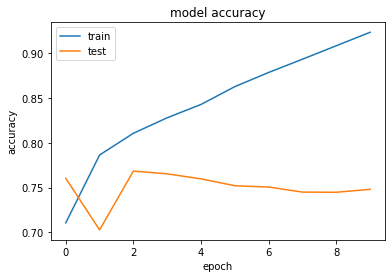

In [192]:
import matplotlib.pyplot as plt


plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

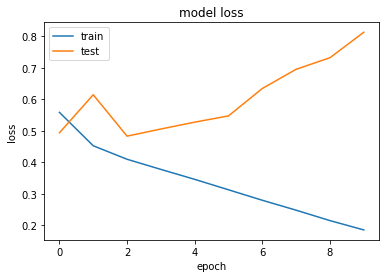

In [193]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [211]:
model1 = Sequential()
model1.add(Embedding(max_words, embedding_dim, input_length=maxlen, weights = [emb_matrix], trainable = False))
model1.add(Flatten())
model1.add(Dense(32, activation='relu'))
model1.add(Dense(1, activation='sigmoid'))
#model1.add(Dropout(rate=0.5))
model1.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_11 (Embedding)     (None, 100, 100)          1000000   
_________________________________________________________________
flatten_10 (Flatten)         (None, 10000)             0         
_________________________________________________________________
dense_19 (Dense)             (None, 32)                320032    
_________________________________________________________________
dense_20 (Dense)             (None, 1)                 33        
Total params: 1,320,065
Trainable params: 320,065
Non-trainable params: 1,000,000
_________________________________________________________________


In [212]:

model1.compile(optimizer='adam',
              loss='binary_crossentropy',metrics=['acc'])
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.25,random_state=50)
print(x_test.shape)
# logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
# tensorboard_callback2 = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)

# print(y_test[0])
history1 = model1.fit(x_train, y_train,
                    epochs=50,
                    batch_size=32,
                    validation_data=(x_test, y_test), )


(12500, 100)
Train on 37500 samples, validate on 12500 samples
Epoch 1/50
37500/37500 [==============================] - 10s 262us/step - loss: 0.6943 - acc: 0.4998 - val_loss: 0.6932 - val_acc: 0.4969
Epoch 2/50
37500/37500 [==============================] - 8s 222us/step - loss: 0.6310 - acc: 0.6423 - val_loss: 0.5545 - val_acc: 0.7398
Epoch 3/50
37500/37500 [==============================] - 9s 229us/step - loss: 0.4979 - acc: 0.7799 - val_loss: 0.5155 - val_acc: 0.7565
Epoch 4/50
37500/37500 [==============================] - 10s 265us/step - loss: 0.4424 - acc: 0.8070 - val_loss: 0.5160 - val_acc: 0.7579
Epoch 5/50
37500/37500 [==============================] - 11s 293us/step - loss: 0.4119 - acc: 0.8256 - val_loss: 0.5435 - val_acc: 0.7510
Epoch 6/50
37500/37500 [==============================] - 8s 205us/step - loss: 0.3919 - acc: 0.8355 - val_loss: 0.5407 - val_acc: 0.7535
Epoch 7/50
37500/37500 [==============================] - 8s 223us/step - loss: 0.3791 - acc: 0.8416 - val

In [197]:
my_text = 'I love dogs. Dogs are the best. They are lovely, cuddly animals that only want the best for humans.'

seq = tokenizer.texts_to_sequences([my_text])
print('raw seq:',seq)
seq = pad_sequences(seq, maxlen=maxlen)
print('padded seq:',seq)
prediction = model1.predict(seq)
print('positivity:',prediction)

raw seq: [[2, 45, 2247, 2247, 612, 3, 48, 118, 612, 1275, 1557, 64, 732, 99, 3, 48, 123, 1821]]
padded seq: [[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    2   45
  2247 2247  612    3   48  118  612 1275 1557   64  732   99    3   48
   123 1821]]
positivity: [[0.9999999]]


In [198]:
my_text = ' The action-drama comes out as a badly made video game.'

seq = tokenizer.texts_to_sequences([my_text])
print('raw seq:',seq)
seq = pad_sequences(seq, maxlen=maxlen)
print('padded seq:',seq)
prediction = model1.predict(seq)
print('positivity:',prediction)

raw seq: [[3, 127, 391, 200, 167, 77, 30, 877, 28, 307, 405]]
padded seq: [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   3
  127 391 200 167  77  30 877  28 307 405]]
positivity: [[0.00864511]]


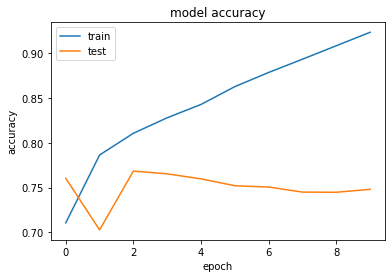

In [199]:
import matplotlib.pyplot as plt


plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

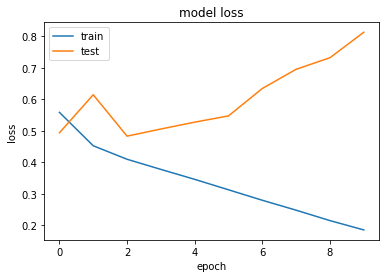

In [200]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [207]:
my_text = "I've had mosquito bites that  than this undead, unrequited, and altogether unfun pseudo-romantic riff on 'Romeo and Juliet."

seq = tokenizer.texts_to_sequences([my_text])
print('raw seq:',seq)
seq = pad_sequences(seq, maxlen=maxlen)
print('padded seq:',seq)
prediction = model1.predict(seq)
print('positivity:',prediction)

raw seq: [[121, 1403, 8740, 64, 3168, 9, 5374, 17, 3502, 3790, 687, 117, 17, 5322]]
padded seq: [[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0  121 1403 8740   64 3168    9 5374   17 3502 3790  687  117
    17 5322]]
positivity: [[0.8516486]]


In [1]:
df.head()

NameError: name 'df' is not defined